In [15]:
# Import necessary libraries and read data set
import pandas as pd
import seaborn as sns


data = pd.read_csv("uber-raw-data-sep14.csv")
data.head(5)


,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [19]:
# ensure date/time is in datetime object not string
data["Date/Time"] = pd.to_datetime(data["Date/Time"])

# Create new column for break the date/time column
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
data["weekday"]= data["Date/Time"].apply(lambda x: x.weekday())

data.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


<Axes: xlabel='Day', ylabel='Density'>

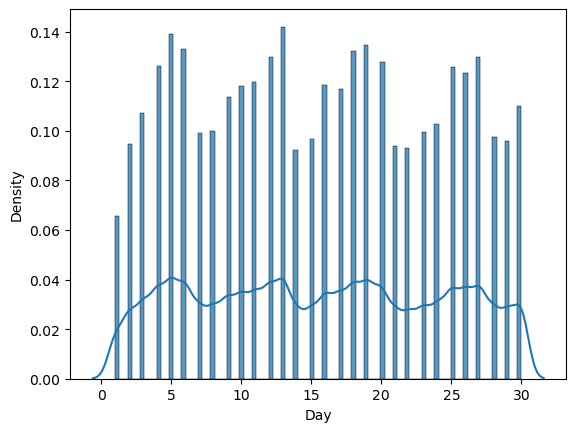

In [32]:
# Plotting for Day column
sns.histplot(data["Day"], stat = "density")
sns.kdeplot(data["Day"])

<Axes: xlabel='Hour', ylabel='Density'>

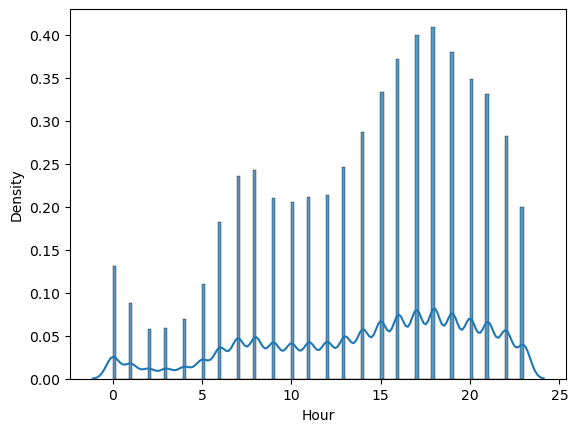

In [30]:
# Plotting for hour column
sns.histplot(data["Hour"], stat= "density")
sns.kdeplot(data["Hour"])

<Axes: xlabel='weekday', ylabel='Density'>

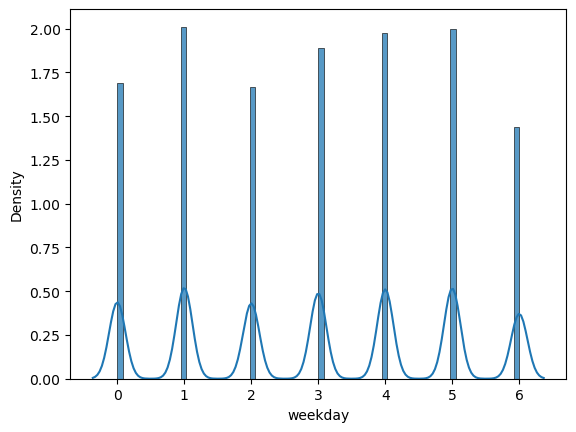

In [31]:
# Plotting for weekday column
sns.histplot(data["weekday"], stat = "density")
sns.kdeplot(data["weekday"])

<Axes: xlabel='Hour', ylabel='weekday'>

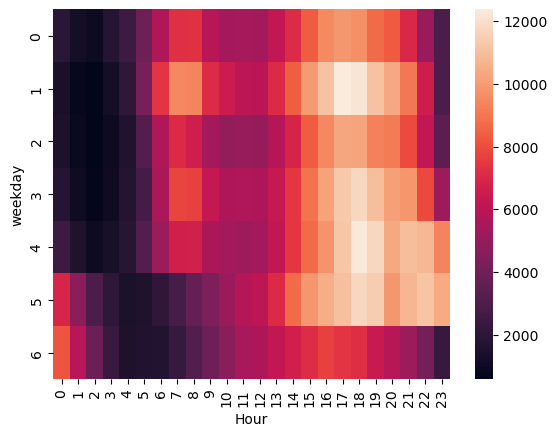

In [23]:
# Correlation between weekday and hour plotting
w_hdata= data.groupby(["weekday","Hour"]).apply(lambda x: len(x))
w_hdata = w_hdata.unstack()
sns.heatmap(w_hdata)

<Axes: xlabel='Lon', ylabel='Lat'>

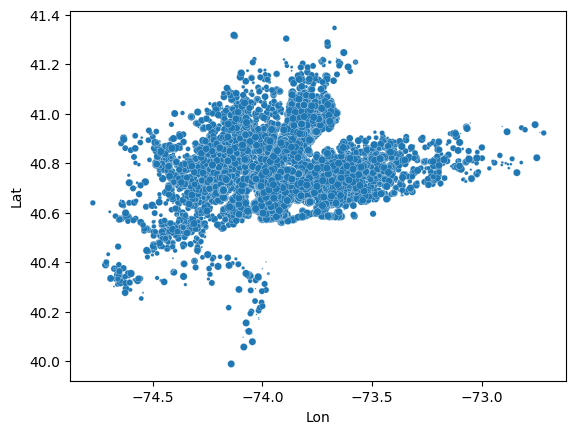

In [28]:
sns.scatterplot(data=data, y="Lat", x="Lon", s=data["Day"])